In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from random import shuffle,randint
from tqdm import tqdm
from shutil import copyfile

In [51]:
IMG_SIZE = 50
x=0
mask_dir = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/processedData/mask'
mask_dir2 = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Dataset/3 12k/Face Mask Dataset/Train/WithMask'
face_dir = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/processedData/face'
face_dir2 = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Dataset/3 12k/Face Mask Dataset/Train/WithoutMask'
val_face_dir = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Dataset/3 12k/Face Mask Dataset/Validation/WithoutMask'
val_mask_dir = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Dataset/3 12k/Face Mask Dataset/Validation/WithMask'

In [50]:
def Extract_Masked_data1():
    global x
    f_dir = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Dataset/1 rmfrd/AFDB_masked_face_dataset/AFDB_masked_face_dataset'
    d_dir = mask_dir
    for folder in tqdm(os.listdir(f_dir)):
        path = os.path.join(f_dir,folder)
        for img in os.listdir(path):
            fpath = os.path.join(path,img)
            dpath = os.path.join(d_dir,str(x)+'.jpg')
            copyfile(fpath, dpath)
            x+=1

def Extract_Unmasked_data1():
    global x
    f_dir = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Dataset/1 rmfrd/AFDB_face_dataset/AFDB_face_dataset'
    d_dir = face_dir
    for folder in tqdm(os.listdir(f_dir)):
        path = os.path.join(f_dir,folder)
        y=0
        for img in os.listdir(path):
            if y>=14: # To make neural net more robust we took only 10 pictures from each person
                break
            if x>=4000: # extracted only 4000 unmasked imgaes because only 1400 masked images exits
                break
            if y%2 == 0:
                y+=1
                continue
            fpath = os.path.join(path,img)
            dpath = os.path.join(d_dir,str(x)+'.jpg')
            copyfile(fpath, dpath)
            x+=1
            y+=1

In [ ]:
def Extract_Masked_data2():
    global x
    f_dir = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Dataset/2/with_mask'
    d_dir = mask_dir
    for img in tqdm(os.listdir(f_dir)):
        fpath = os.path.join(f_dir,img)            
        dpath = os.path.join(d_dir,str(x)+'.png')
        copyfile(fpath, dpath)
        x+=1
        
def Extract_Unmasked_data2():
    global x
    f_dir = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Dataset/2/without_mask'
    d_dir = face_dir
    for img in tqdm(os.listdir(f_dir)):
        fpath = os.path.join(f_dir,img)
        dpath = os.path.join(d_dir,str(x)+'.png')
        copyfile(fpath, dpath)
        x+=1

In [ ]:
def Extract_Masked_data3():
    global x
    f_dir = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Dataset/3/WithMask'
    d_dir = mask_dir
    for img in tqdm(os.listdir(f_dir)):
        if 1 == randint(0,4):
            fpath = os.path.join(f_dir,img)            
            dpath = os.path.join(d_dir,str(x)+'.png')
            copyfile(fpath, dpath)
            x+=1
        
def Extract_Unmasked_data3():
    global x
    f_dir = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Dataset/3/WithoutMask'
    d_dir = face_dir
    for img in tqdm(os.listdir(f_dir)):
        fpath = os.path.join(f_dir,img)
        dpath = os.path.join(d_dir,str(x)+'.png')
        copyfile(fpath, dpath)
        x+=1

In [52]:
Extract_Unmasked_data1()
#Extract_Unmasked_data2()
#Extract_Unmasked_data3()
#Extract_Masked_data1()
#Extract_Masked_data2()
#Extract_Masked_data3()

100%|████████████████████████████████████████████████████████████████████████████████| 460/460 [01:10<00:00,  6.48it/s]


In [ ]:
def Extract_Unmasked_data4():
    global x
    f_dir = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Dataset/4/lfw_funneled'
    d_dir = face_dir
    for folder in tqdm(os.listdir(f_dir)):
        path = os.path.join(f_dir,folder)
        y=0
        for img in os.listdir(path):
            if y>=3:
                break
            fpath = os.path.join(path,img)
            dpath = os.path.join(d_dir,str(x)+'.jpg')
            copyfile(fpath, dpath)
            x+=1
            y+=1
Extract_Unmasked_data4()

In [26]:
data_npy = []
def process_data():
    y=0
    for img in tqdm(os.listdir('C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Dataset/3 12k/Face Mask Dataset/Train/WithMask')):
        label = [1,0]
        path = os.path.join('C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Dataset/3 12k/Face Mask Dataset/Train/WithMask',img)
        img = cv2.resize(cv2.imread(path,cv2.IMREAD_REDUCED_GRAYSCALE_2),(IMG_SIZE,IMG_SIZE))
        img=img/255
        data_npy.append([np.array(img),np.array(label)])
        y+=1
        
    y=0    
    for img in tqdm(os.listdir('C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Dataset/3 12k/Face Mask Dataset/Train/WithoutMask')):
        label = [0,1]
        path = os.path.join('C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Dataset/3 12k/Face Mask Dataset/Train/WithoutMask',img)
        img = cv2.resize(cv2.imread(path,cv2.IMREAD_REDUCED_GRAYSCALE_2),(IMG_SIZE,IMG_SIZE))
        img=img/255
        data_npy.append([np.array(img),np.array(label)])
        y+=1

In [55]:
data_npy = []
def process_data():
    y=0
    
    for img in tqdm(os.listdir(face_dir)):
        if y>=4000:
            break
        if 0 == randint(0,3) or True: 
            label = [0,1]
            path = os.path.join(face_dir,img)
            img = cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
            img=img/255
            data_npy.append([np.array(img),np.array(label)])
            y+=1
        
        
    for img in tqdm(os.listdir(mask_dir)):
        label = [1,0]
        path = os.path.join(mask_dir,img)
        img = cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
        img=img/255
        data_npy.append([np.array(img),np.array(label)])
        
    
    for img in tqdm(os.listdir(val_face_dir)):
        label = [0,1]
        path = os.path.join(val_face_dir,img)
        img = cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
        img=img/255
        data_npy.append([np.array(img),np.array(label)])
        
        
    for img in tqdm(os.listdir(val_mask_dir)):
        label = [1,0]
        path = os.path.join(val_mask_dir,img)
        img = cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
        img=img/255
        data_npy.append([np.array(img),np.array(label)])
    

In [56]:
process_data()

100%|███████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 578.75it/s]


In [57]:
#shuffle(data_npy)
print(len(data_npy))
X = np.array([i[0] for i in data_npy]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = np.array([i[1] for i in data_npy])

5412


(5412, 50, 50, 1)


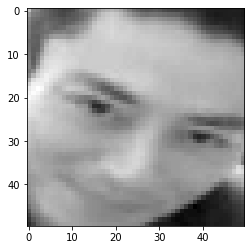

[0 1]


In [59]:
f=3000
print(X.shape)
plt.imshow(X[f],cmap='gray')
plt.show()
#print(X[f])
print(Y[f])

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Conv2D,MaxPooling2D,BatchNormalization,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [60]:
tf.compat.v1.reset_default_graph()
tf.keras.backend.clear_session()
model = Sequential([
    Conv2D(128, (2,2), activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,1)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Dropout(0.4),
    
    Conv2D(64, (2,2), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Dropout(0.4),
    
    Conv2D(64, (2,2), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Dropout(0.4),
    
    Conv2D(32, (2,2), activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    
    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(32, activation='relu'),
    #BatchNormalization(),
    
    Dense(2, activation='softmax')
])
model.summary()
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 49, 49, 128)       640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 128)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 128)       512       
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 64)        2

In [76]:
model.fit(x=X, y=Y, validation_split=0.156, batch_size=32, epochs=10, shuffle=True,verbose=1)

Epoch 1/10
143/143 [==============================] - 100s 697ms/step - loss: 0.3394 - accuracy: 0.8577 - val_loss: 1.0771 - val_accuracy: 0.5586
Epoch 2/10
143/143 [==============================] - 118s 824ms/step - loss: 0.3325 - accuracy: 0.8699 - val_loss: 1.0774 - val_accuracy: 0.5645
Epoch 3/10
143/143 [==============================] - 120s 838ms/step - loss: 0.3148 - accuracy: 0.8774 - val_loss: 0.9689 - val_accuracy: 0.5953
Epoch 4/10
143/143 [==============================] - 124s 867ms/step - loss: 0.3211 - accuracy: 0.8728 - val_loss: 0.9805 - val_accuracy: 0.5964
Epoch 5/10
143/143 [==============================] - 116s 812ms/step - loss: 0.3108 - accuracy: 0.8723 - val_loss: 0.9677 - val_accuracy: 0.6000
Epoch 6/10
143/143 [==============================] - 118s 824ms/step - loss: 0.3002 - accuracy: 0.8831 - val_loss: 0.9830 - val_accuracy: 0.6000
Epoch 7/10
143/143 [==============================] - 115s 806ms/step - loss: 0.2843 - accuracy: 0.8855 - val_loss: 0.9561 -

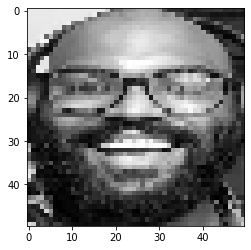

1/1 [==============================] - 0s 2ms/step


array([[0.96779966, 0.0322003 ]], dtype=float32)

In [63]:
inputTest = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/sandynomask.jpg'
image = cv2.resize(cv2.imread(inputTest,cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
image=image/255
#print(image)
plt.imshow(image,cmap='gray')
plt.show()
#predict(model.predict(np.array(image).reshape(-1,IMG_SIZE,IMG_SIZE,1)))
model.predict(np.array(image).reshape(-1,IMG_SIZE,IMG_SIZE,1),verbose=1)

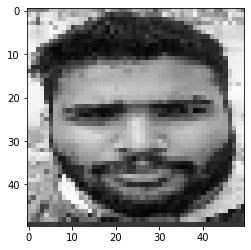

1/1 [==============================] - 0s 2ms/step


array([[0.44475138, 0.5552487 ]], dtype=float32)

In [64]:
inputTest = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Capture2.jpg'
image = cv2.resize(cv2.imread(inputTest,cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
image=image/255
#print(image)
plt.imshow(image,cmap='gray')
plt.show()
#predict(model.predict(np.array(image).reshape(-1,IMG_SIZE,IMG_SIZE,1)))
model.predict(np.array(image).reshape(-1,IMG_SIZE,IMG_SIZE,1),verbose=1)

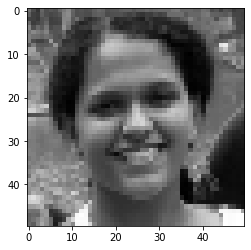

1/1 [==============================] - 0s 996us/step


array([[0.13059656, 0.8694035 ]], dtype=float32)

In [65]:
inputTest = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Capture3.jpg'
image = cv2.resize(cv2.imread(inputTest,cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
image=image/255
#print(image)
plt.imshow(image,cmap='gray')
plt.show()
#predict(model.predict(np.array(image).reshape(-1,IMG_SIZE,IMG_SIZE,1)))
model.predict(np.array(image).reshape(-1,IMG_SIZE,IMG_SIZE,1),verbose=1)

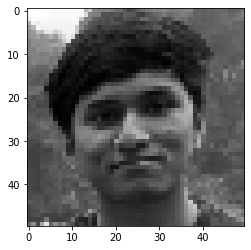

1/1 [==============================] - 0s 5ms/step


array([[0.13370438, 0.8662956 ]], dtype=float32)

In [66]:
inputTest = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Capture4.jpg'
image = cv2.resize(cv2.imread(inputTest,cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
image=image/255
#print(image)
plt.imshow(image,cmap='gray')
plt.show()
#predict(model.predict(np.array(image).reshape(-1,IMG_SIZE,IMG_SIZE,1)))
model.predict(np.array(image).reshape(-1,IMG_SIZE,IMG_SIZE,1),verbose=1)

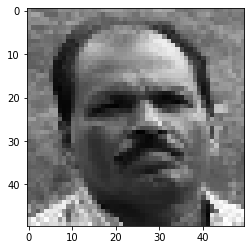

1/1 [==============================] - 0s 997us/step


array([[0.19780894, 0.802191  ]], dtype=float32)

In [67]:
inputTest = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Capture5.jpg'
image = cv2.resize(cv2.imread(inputTest,cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
image=image/255
#print(image)
plt.imshow(image,cmap='gray')
plt.show()
#predict(model.predict(np.array(image).reshape(-1,IMG_SIZE,IMG_SIZE,1)))
model.predict(np.array(image).reshape(-1,IMG_SIZE,IMG_SIZE,1),verbose=1)

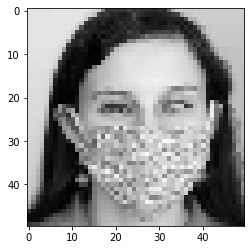

1/1 [==============================] - 0s 999us/step


array([[0.26477808, 0.7352219 ]], dtype=float32)

In [68]:
inputTest = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Capture6.jpg'
image = cv2.resize(cv2.imread(inputTest,cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
image=image/255
#print(image)
plt.imshow(image,cmap='gray')
plt.show()
#predict(model.predict(np.array(image).reshape(-1,IMG_SIZE,IMG_SIZE,1)))
model.predict(np.array(image).reshape(-1,IMG_SIZE,IMG_SIZE,1),verbose=1)

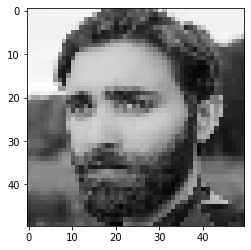

1/1 [==============================] - 0s 998us/step


array([[0.07805292, 0.92194706]], dtype=float32)

In [69]:
inputTest = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Capture7.jpg'
image = cv2.resize(cv2.imread(inputTest,cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
image=image/255
#print(image)
plt.imshow(image,cmap='gray')
plt.show()
#predict(model.predict(np.array(image).reshape(-1,IMG_SIZE,IMG_SIZE,1)))
model.predict(np.array(image).reshape(-1,IMG_SIZE,IMG_SIZE,1),verbose=1)

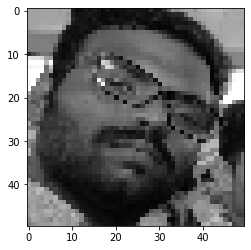

1/1 [==============================] - 0s 995us/step


array([[0.20606232, 0.7939377 ]], dtype=float32)

In [70]:
inputTest = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Capture8.jpg'
image = cv2.resize(cv2.imread(inputTest,cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
image=image/255
#print(image)
plt.imshow(image,cmap='gray')
plt.show()
#predict(model.predict(np.array(image).reshape(-1,IMG_SIZE,IMG_SIZE,1)))
model.predict(np.array(image).reshape(-1,IMG_SIZE,IMG_SIZE,1),verbose=1)

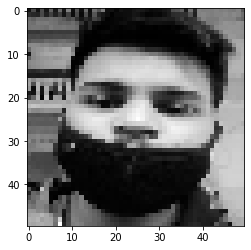

1/1 [==============================] - 0s 999us/step


array([[0.9400397 , 0.05996024]], dtype=float32)

In [71]:
inputTest = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Capture9.jpg'
image = cv2.resize(cv2.imread(inputTest,cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
image=image/255
#print(image)
plt.imshow(image,cmap='gray')
plt.show()
#predict(model.predict(np.array(image).reshape(-1,IMG_SIZE,IMG_SIZE,1)))
model.predict(np.array(image).reshape(-1,IMG_SIZE,IMG_SIZE,1),verbose=1)

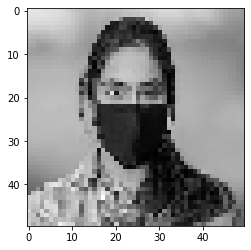

1/1 [==============================] - 0s 991us/step


array([[0.7853881, 0.2146119]], dtype=float32)

In [72]:
inputTest = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Capture10.jpg'
image = cv2.resize(cv2.imread(inputTest,cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
image=image/255
#print(image)
plt.imshow(image,cmap='gray')
plt.show()
#predict(model.predict(np.array(image).reshape(-1,IMG_SIZE,IMG_SIZE,1)))
model.predict(np.array(image).reshape(-1,IMG_SIZE,IMG_SIZE,1),verbose=1)

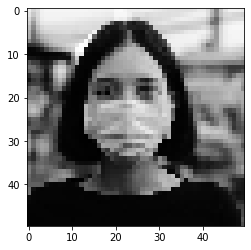

1/1 [==============================] - 0s 996us/step


array([[0.63942325, 0.36057675]], dtype=float32)

In [73]:
inputTest = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Capture11.jpg'
image = cv2.resize(cv2.imread(inputTest,cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
image=image/255
#print(image)
plt.imshow(image,cmap='gray')
plt.show()
#predict(model.predict(np.array(image).reshape(-1,IMG_SIZE,IMG_SIZE,1)))
model.predict(np.array(image).reshape(-1,IMG_SIZE,IMG_SIZE,1),verbose=1)

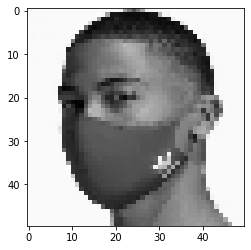

1/1 [==============================] - 0s 985us/step


array([[0.37090647, 0.62909347]], dtype=float32)

In [75]:
inputTest = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Capture12.jpg'
image = cv2.resize(cv2.imread(inputTest,cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
image=image/255
#print(image)
plt.imshow(image,cmap='gray')
plt.show()
#predict(model.predict(np.array(image).reshape(-1,IMG_SIZE,IMG_SIZE,1)))
model.predict(np.array(image).reshape(-1,IMG_SIZE,IMG_SIZE,1),verbose=1)